In [1]:
# Set the GPU growth to avoid the event "Failed to get convolution algorithm"

import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [2]:
from vgg16_conv_base import Vgg16

conv_base = Vgg16(input_shape=(150,150,3), num_classes=1)

In [3]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 37, 256)       295168

In [4]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

train_dir = '/home/mike/Documents/keras_vgg16_tf2/cats_and_dogs_small/train'
validation_dir = '/home/mike/Documents/keras_vgg16_tf2/cats_and_dogs_small/validation'
test_dir = '/home/mike/Documents/keras_vgg16_tf2/cats_and_dogs_small/test'


datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    
    i = 0
    
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
            
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=100,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/100
100/100 [==============================] - 0s 4ms/step - loss: 0.6932 - acc: 0.4955 - val_loss: 0.6930 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 0s 3ms/step - loss: 0.6930 - acc: 0.5000 - val_loss: 0.6930 - val_acc: 0.5000
Epoch 3/100
100/100 [==============================] - 0s 3ms/step - loss: 0.6930 - acc: 0.5020 - val_loss: 0.6929 - val_acc: 0.5000
Epoch 4/100
100/100 [==============================] - 0s 3ms/step - loss: 0.6929 - acc: 0.5010 - val_loss: 0.6928 - val_acc: 0.5000
Epoch 5/100
100/100 [==============================] - 0s 3ms/step - loss: 0.6928 - acc: 0.5000 - val_loss: 0.6928 - val_acc: 0.5000
Epoch 6/100
100/100 [==============================] - 0s 2ms/step - loss: 0.6927 - acc: 0.5000 - val_loss: 0.6927 - val_acc: 0.5000
Epoch 7/100
100/100 [==============================] - 0s 2ms/step - loss: 0.6927 - acc: 0.5020 - val_loss: 0.6927 - val_acc: 0.5000
Epoch 8/100
100/100 [==============================] - 0s 3ms/step - 

100/100 [==============================] - 0s 2ms/step - loss: 0.6879 - acc: 0.5905 - val_loss: 0.6890 - val_acc: 0.5720
Epoch 63/100
100/100 [==============================] - 0s 2ms/step - loss: 0.6880 - acc: 0.6070 - val_loss: 0.6889 - val_acc: 0.5620
Epoch 64/100
100/100 [==============================] - 0s 3ms/step - loss: 0.6877 - acc: 0.5845 - val_loss: 0.6888 - val_acc: 0.5720
Epoch 65/100
100/100 [==============================] - 0s 3ms/step - loss: 0.6874 - acc: 0.6015 - val_loss: 0.6887 - val_acc: 0.5650
Epoch 66/100
100/100 [==============================] - 0s 3ms/step - loss: 0.6874 - acc: 0.6055 - val_loss: 0.6887 - val_acc: 0.5720
Epoch 67/100
100/100 [==============================] - 0s 2ms/step - loss: 0.6872 - acc: 0.6050 - val_loss: 0.6886 - val_acc: 0.5690
Epoch 68/100
100/100 [==============================] - 0s 3ms/step - loss: 0.6875 - acc: 0.5935 - val_loss: 0.6885 - val_acc: 0.5700
Epoch 69/100
100/100 [==============================] - 0s 3ms/step - loss:

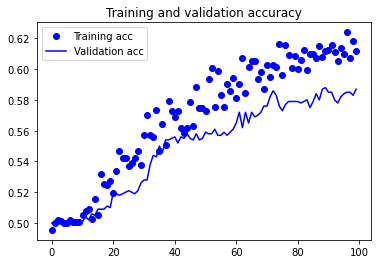

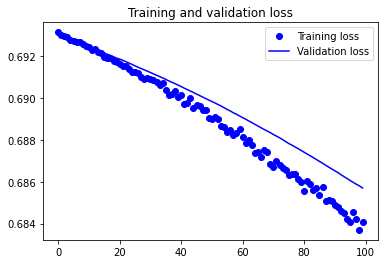

In [6]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()